# goPriceReturns
## Script to download historical data from Yahoo!Finance and generate predictions.

In [1]:
# import necessary libraries
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Choose a time period.

In [2]:
# define end time
endT = dt.datetime.now()

# define start time
startT = dt.date(endT.year-1, endT.month, endT.day)

## Choose symbols.

In [3]:
# grab ticker for symbols of interest
btc = yf.Ticker("BTC-USD")
eth = yf.Ticker("ETH-USD")
xrp = yf.Ticker("XRP-USD")
hbar = yf.Ticker("HBAR-USD")
mana = yf.Ticker("MANA-USD")

## Get historical data.

In [4]:
# get historical market data
# histBTC = btc.history(period="max")
# histETH = eth.history(period="max")
# histXRP = xrp.history(period="max")
# histHBAR = hbar.history(period="max")
# histMANA = mana.history(period="max")

histBTC = btc.history(start=startT, end=dt.datetime.now())
histETH = eth.history(start=startT, end=dt.datetime.now())
histXRP = xrp.history(start=startT, end=dt.datetime.now())
histHBAR = hbar.history(start=startT, end=dt.datetime.now())
histMANA= mana.history(start=startT, end=dt.datetime.now())

## Plot closing price in USD.

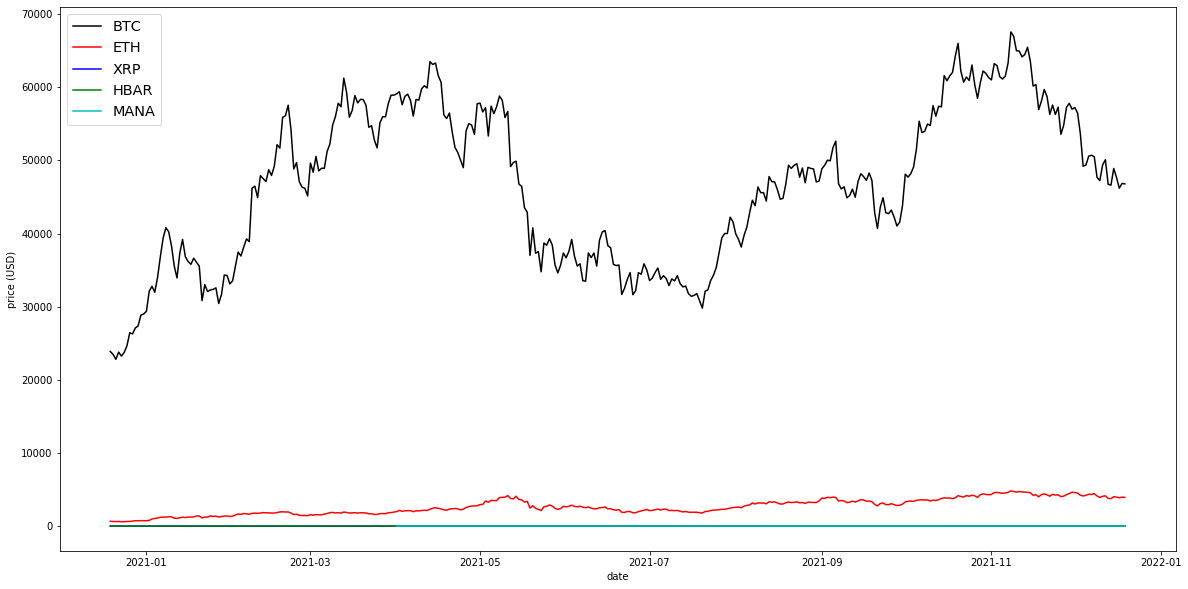

In [270]:
# plot raw price data
plt.figure(figsize=(20,10))

plt.plot(histBTC["Close"], label="BTC", c="k")
plt.plot(histETH["Close"], label="ETH", c="r")
plt.plot(histXRP["Close"], label="XRP", c="b")
plt.plot(histHBAR["Close"], label="HBAR", c="g")
plt.plot(histMANA["Close"], label="MANA", c="c")
plt.xlabel("date")
plt.ylabel("price (USD)")
plt.legend(loc="upper left", fontsize="x-large")

plt.show()

## Take a look at price of individual assets.

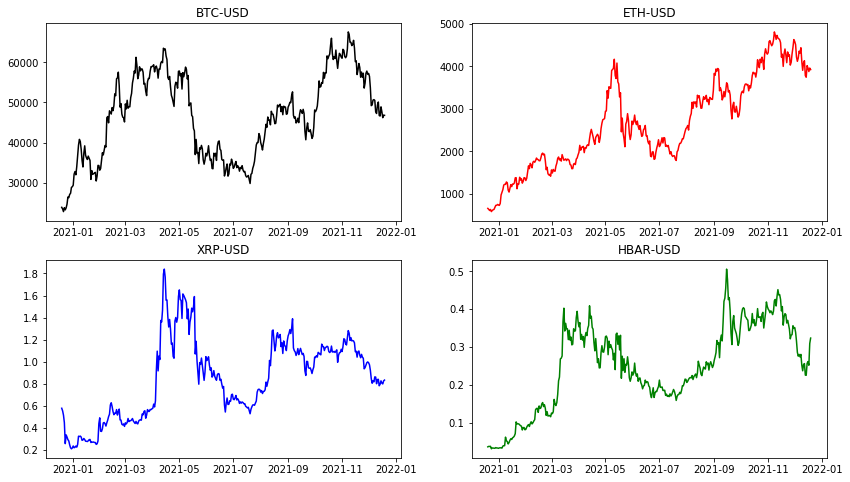

In [271]:
# plot price in separate plots
fig, axs = plt.subplots(2,2, figsize=(14,8))

axs[0,0].plot(histBTC["Close"], c="k")
axs[0,0].set_title("BTC-USD")
axs[0,1].plot(histETH["Close"], c="r")
axs[0,1].set_title("ETH-USD")
axs[1,0].plot(histXRP["Close"], c="b")
axs[1,0].set_title("XRP-USD")
axs[1,1].plot(histHBAR["Close"], c="g")
axs[1,1].set_title("HBAR-USD")

plt.show()

## Get returns (i.e., percentage change).

In [272]:
# calculate daily percent returned (dropping NA)
dailyReturnBTC = histBTC["Close"].pct_change().dropna()
dailyReturnETH = histETH["Close"].pct_change().dropna()
dailyReturnXRP = histXRP["Close"].pct_change().dropna()
dailyReturnHBAR = histHBAR["Close"].pct_change().dropna()
dailyReturnMANA = histMANA["Close"].pct_change().dropna()

## What do daily returns look over time? Can think of this as a measure of volatility.

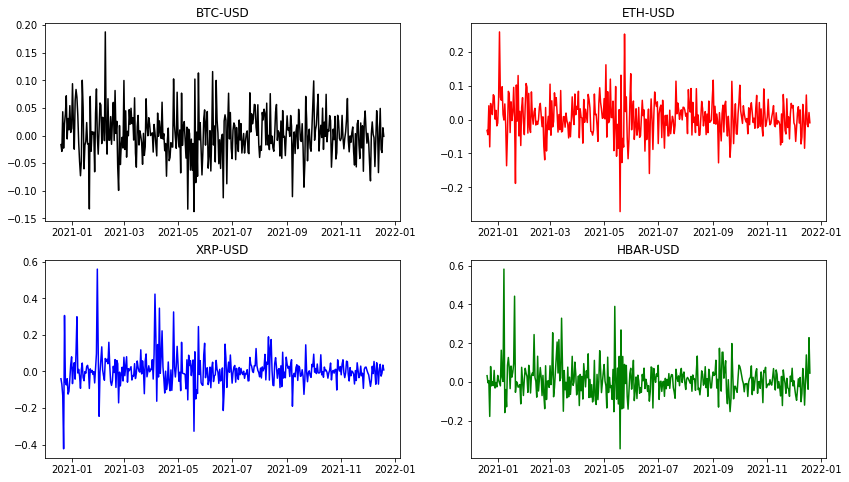

In [273]:
# plot daily returns over time (i.e., volatilities)
fig, axs = plt.subplots(2,2, figsize=(14,8))

axs[0,0].plot(dailyReturnBTC, c="k")
axs[0,0].set_title("BTC-USD")
axs[0,1].plot(dailyReturnETH, c="r")
axs[0,1].set_title("ETH-USD")
axs[1,0].plot(dailyReturnXRP, c="b")
axs[1,0].set_title("XRP-USD")
axs[1,1].plot(dailyReturnHBAR, c="g")
axs[1,1].set_title("HBAR-USD")

plt.show()

## How are returns distributed?

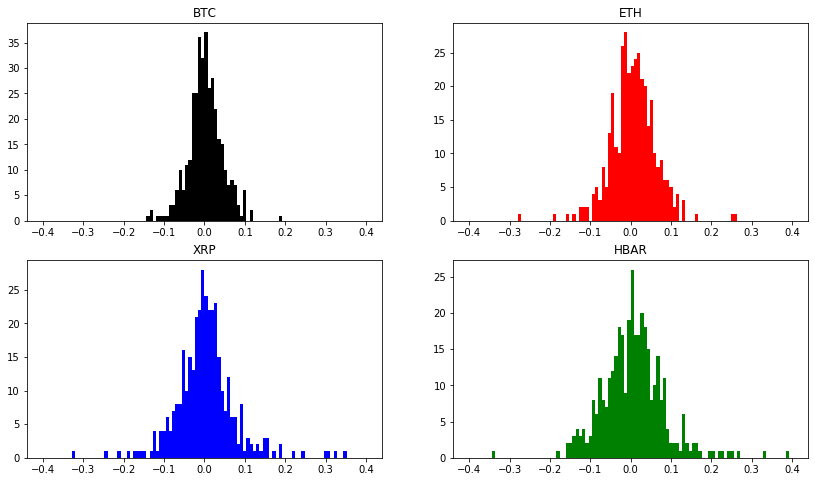

In [274]:
# distributions of returns
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

axs[0,0].hist(dailyReturnBTC, bins=100, color='k', range=(-0.4, 0.4))
axs[0,0].set_title("BTC")
axs[0,1].hist(dailyReturnETH, bins=100, color='r', range=(-0.4, 0.4))
axs[0,1].set_title("ETH")
axs[1,0].hist(dailyReturnXRP, bins=100, color='b', range=(-0.4, 0.4))
axs[1,0].set_title("XRP")
axs[1,1].hist(dailyReturnHBAR, bins=100, color='g', range=(-0.4, 0.4))
axs[1,1].set_title("HBAR")

plt.show()

## Calculate the cumulative returns.

In [275]:
# calculate cumulative return
dailyCumReturnBTC = (dailyReturnBTC + 1).cumprod() -1
dailyCumReturnETH = (dailyReturnETH + 1).cumprod() -1
dailyCumReturnXRP = (dailyReturnXRP + 1).cumprod() -1
dailyCumReturnHBAR = (dailyReturnHBAR + 1).cumprod() -1
dailyCumReturnMANA = (dailyReturnMANA + 1).cumprod() -1 

## What do cumulative returns look like across time?

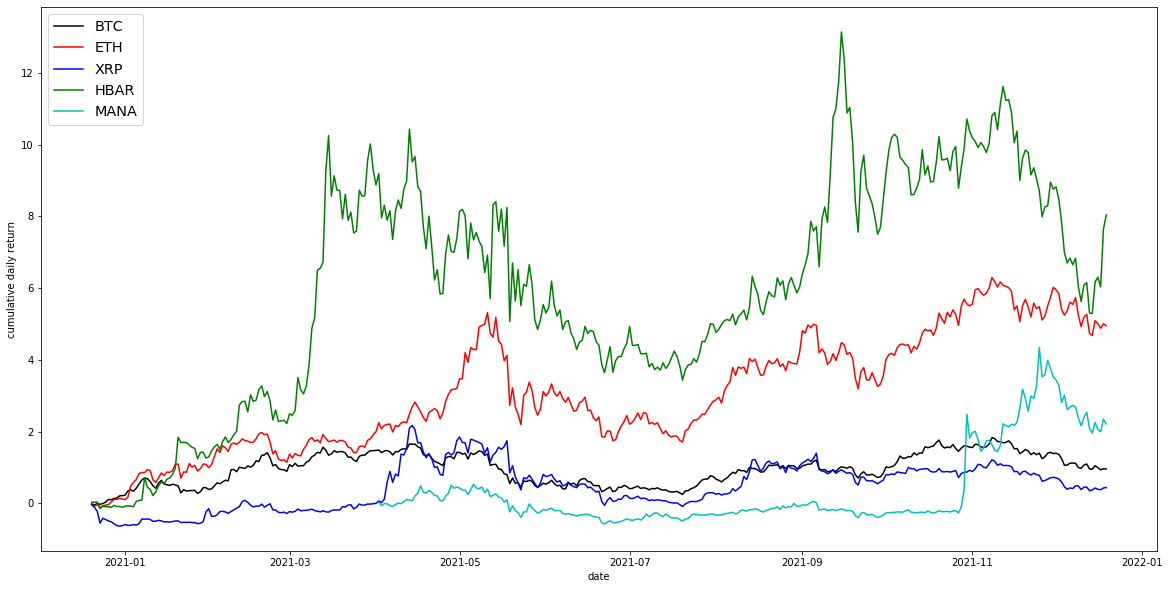

In [276]:
# plot cumulative return
plt.figure(figsize=(20,10))

plt.plot(dailyCumReturnBTC, label="BTC", c="k")
plt.plot(dailyCumReturnETH, label="ETH", c="r")
plt.plot(dailyCumReturnXRP, label="XRP", c="b")
plt.plot(dailyCumReturnHBAR, label="HBAR", c="g")
plt.plot(dailyCumReturnMANA, label="MANA", c="c")
plt.xlabel("date")
plt.ylabel("cumulative daily return")
plt.legend(loc="upper left", fontsize="x-large")

plt.show()

## Generate a Pandas dataframe.

In [277]:
# generate Pandas dataframe for cumulative returns
df = pd.DataFrame({
    'BTC': dailyReturnBTC,
    'ETH': dailyReturnETH,
    'XRP': dailyReturnXRP,
    'HBAR': dailyReturnHBAR,
    'MANA': dailyReturnMANA
})

## Are there any extreme returns (i.e., outliers)?

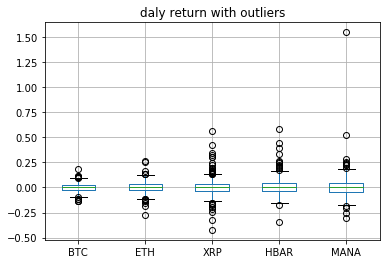

In [278]:
# extreme returns (i.e., with outliers)
df.boxplot()
plt.title("daily return with outliers")
plt.show()

## Clean up the data. Only used here for visual.

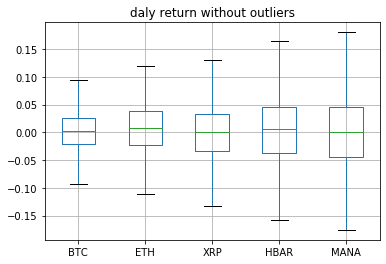

In [279]:
# cleaned returns (i.e., with outlier removal)
df.boxplot(showfliers=False)
plt.title("daly return without outliers")
plt.show()

## Are the returns correlated?

In [280]:
# correlations across days between returns
df.corr()

,BTC,ETH,XRP,HBAR,MANA
BTC,1.000000,0.756751,0.499073,0.493950,0.384111
ETH,0.756751,1.000000,0.508703,0.471296,0.397511
XRP,0.499073,0.508703,1.000000,0.382228,0.320293
HBAR,0.493950,0.471296,0.382228,1.000000,0.403954
MANA,0.384111,0.397511,0.320293,0.403954,1.000000


## Visualize correlations.

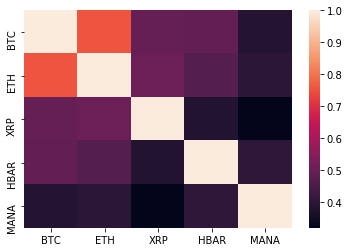

In [306]:
# heatmap with correlations
sns.heatmap(df.corr())
plt.show()

## Import a model for price prediction.

In [ ]:
# import model for prediction
from fbprophet import Prophet
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## Use the model to predict price of Bitcoin.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


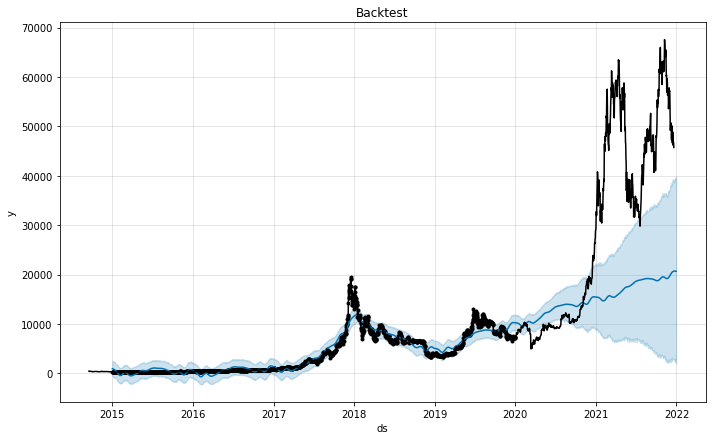

In [345]:
# use model to predict BTC
# define end time
endT = dt.date(2020, 1, 1)

# define start time
startT = dt.date(2015, 1, 1)

# get price history
histBTC = btc.history(start=startT, end=endT)
histBTCmax = btc.history(period="max")

# generate dataframe
dfBTC = pd.DataFrame({
    'BTC': histBTC["Close"]
})

# define model
modelfb1 = Prophet()

# 
dfBTC = dfBTC.reset_index()

# generate parameters for the model
dfBTC[["ds","y"]] = dfBTC[["Date","BTC"]]

# fit the Bitcoin price data
modelfb1.fit(dfBTC)

# predict future price
future = modelfb1.make_future_dataframe(periods=730)
prediction = modelfb1.predict(future)

# plot history and prediction
modelfb1.plot(prediction)
plt.plot(histBTCmax["Close"], label="BTC", c="k")
plt.title("Backtest")
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


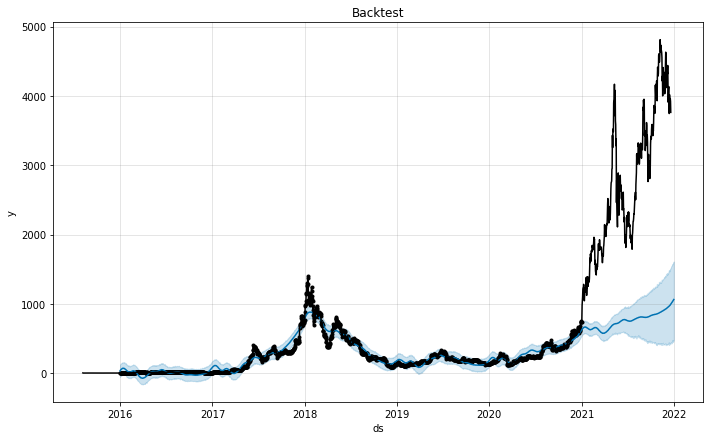

In [341]:
# same as above for ETH
endT = dt.date(2021, 1, 1)
startT = dt.date(2016, 1, 1)

# get price history
histETH = eth.history(start=startT, end=endT)
histETHmax = eth.history(period="max")

dfETH = pd.DataFrame({
    'ETH': histETH["Close"]
})
modelfb1 = Prophet()
dfETH = dfETH.reset_index()
dfETH[["ds","y"]] = dfETH[["Date","ETH"]]
modelfb1.fit(dfETH)
future = modelfb1.make_future_dataframe(periods=365)
prediction = modelfb1.predict(future)
modelfb1.plot(prediction)
plt.plot(histETHmax["Close"], label="ETH", c="k")
plt.title("Backtest")
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


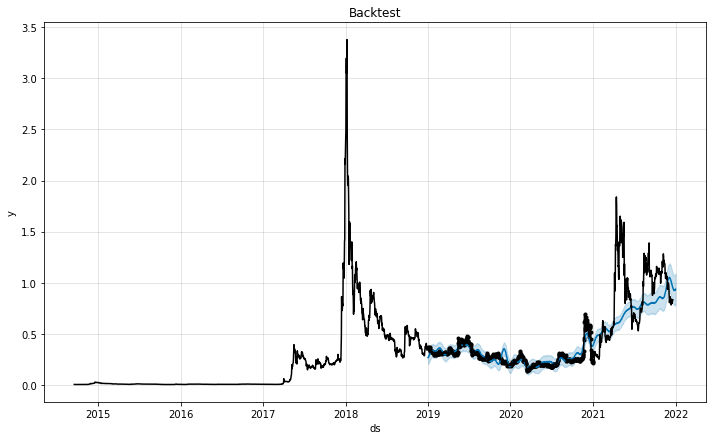

In [344]:
# same as above for XRP
endT = dt.date(2021, 1, 1)
startT = dt.date(2019, 1, 1)
histXRP = xrp.history(start=startT, end=endT)
histXRPmax = xrp.history(period="max")
dfXRP = pd.DataFrame({
    'XRP': histXRP["Close"]
})
modelfb1 = Prophet()
dfXRP = dfXRP.reset_index()
dfXRP[["ds","y"]] = dfXRP[["Date","XRP"]]
modelfb1.fit(dfXRP)
future = modelfb1.make_future_dataframe(periods=365)
prediction = modelfb1.predict(future)
modelfb1.plot(prediction)
plt.plot(histXRPmax["Close"], label="XRP", c="k")
plt.title("Backtest")
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


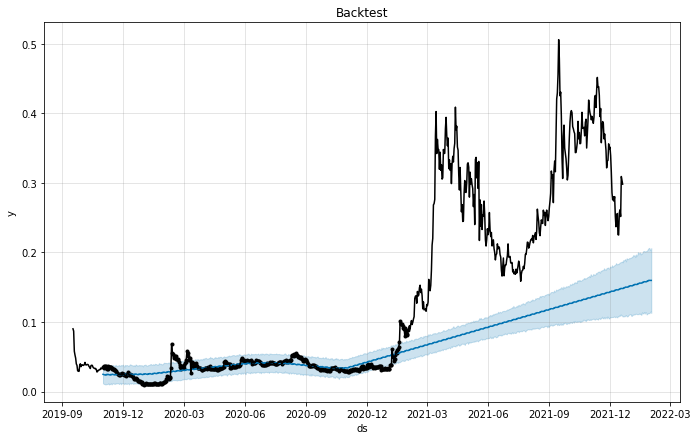

In [349]:
# same as above for HBAR
endT = dt.date(2021, 2, 1)
startT = dt.date(2019, 11, 1)
histHBAR = hbar.history(start=startT, end=endT)
histHBARmax = hbar.history(period="max")
dfHBAR = pd.DataFrame({
    'HBAR': histHBAR["Close"]
})
modelfb1 = Prophet()
dfHBAR = dfHBAR.reset_index()
dfHBAR[["ds","y"]] = dfHBAR[["Date","HBAR"]]
modelfb1.fit(dfHBAR)
future = modelfb1.make_future_dataframe(periods=365)
prediction = modelfb1.predict(future)
modelfb1.plot(prediction)
plt.plot(histHBARmax["Close"], label="HBAR", c="k")
plt.title("Backtest")
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


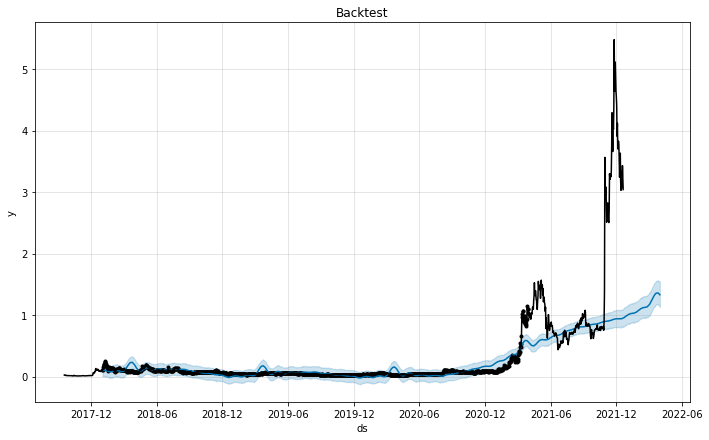

In [355]:
# same as above for MANA
endT = dt.date(2021, 4, 1)
startT = dt.date(2018, 1, 1)
histMANA = mana.history(start=startT, end=endT)
histMANAmax = mana.history(period="max")
dfMANA = pd.DataFrame({
    'MANA': histMANA["Close"]
})
modelfb1 = Prophet()
dfMANA = dfMANA.reset_index()
dfMANA[["ds","y"]] = dfMANA[["Date","MANA"]]
modelfb1.fit(dfMANA)
future = modelfb1.make_future_dataframe(periods=365)
prediction = modelfb1.predict(future)
modelfb1.plot(prediction)
plt.plot(histMANAmax["Close"], label="MANA", c="k")
plt.title("Backtest")
plt.show()